[gsm프로젝트 코드0]

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,378 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

[gsm프로젝트 코드1]

In [ ]:
#1. 데이터준비
from google.colab import files
# 파일 업로드 창을 띄우고, 선택된 파일을 업로드합니다.
uploaded = files.upload()

Saving gsm_By_TimeSeries_202001_202410.csv to gsm_By_TimeSeries_202001_202410.csv


In [ ]:
import pandas as pd

df = pd.read_csv('gsm_By_TimeSeries_202001_202410.csv')

data = df[['Date', 'Arrival', 'Departure', 'Total']]

# 데이터 확인
print(data.head())

      Date    Arrival  Departure      Total
0  2023-01  1,839,927  2,005,226  3,845,153
1  2023-02  1,921,962  1,808,537  3,730,499
2  2023-03  2,039,130  1,869,885  3,909,015
3  2023-04  2,023,823  2,024,364  4,048,187
4  2023-05  2,195,137  2,199,755  4,394,892


[gsm프로젝트 코드2]

In [ ]:
# 'Date' 컬럼을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')

# 인덱스를 Date로 변경
data.set_index('Date', inplace=True)

# 학습을 위한 Total 열 string -> float 변경
data['Total'] = data['Total'].replace({',': ''}, regex=True).astype(float)

# 결과 확인
print(data['Total'].head())

Date
2023-01-01    3845153.0
2023-02-01    3730499.0
2023-03-01    3909015.0
2023-04-01    4048187.0
2023-05-01    4394892.0
Name: Total, dtype: float64


[gsm프로젝트 코드3]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA 모델 적용: (1, 1, 1)
model = ARIMA(data['Total'], order=(1, 1, 1))

# 모델 학습
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[gsm프로젝트 코드4]

In [ ]:
# 3개월 치 예측
model_steps = 3
forecast = model_fit.forecast(steps=model_steps)

# 예측 결과 출력
print("1개월 후:", forecast[0]) # 첫 번째 예측값
print("2개월 후:", forecast[1]) # 두 번째 예측값
print("3개월 후:", forecast[2]) # 세 번째 예측값

1개월 후: 6164126.2260870645
2개월 후: 6182057.3119671205
3개월 후: 6173908.343921343


<ipython-input-51-a87437517b43>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("1개월 후:", forecast[0]) # 첫 번째 예측값
<ipython-input-51-a87437517b43>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("2개월 후:", forecast[1]) # 두 번째 예측값
<ipython-input-51-a87437517b43>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("3개월 후:", forecast[2]) # 세 번째 예측값


[gsm프로젝트 코드5]

<ipython-input-55-5031d77ace64>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data.index[-1], periods=model_steps + 1, freq='M')[1:]
<ipython-input-55-5031d77ace64>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(forecast_dates[0], forecast[0], label="1개월 후 총 승객 수", marker='o', color='red')
<ipython-input-55-5031d77ace64>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(forecast_dates[1], forecast[1], label="2개월 후 총 승객 수", marker='o', color='orange')
<ipython-input-55-5031d77ace64>:14: FutureWarning: Se

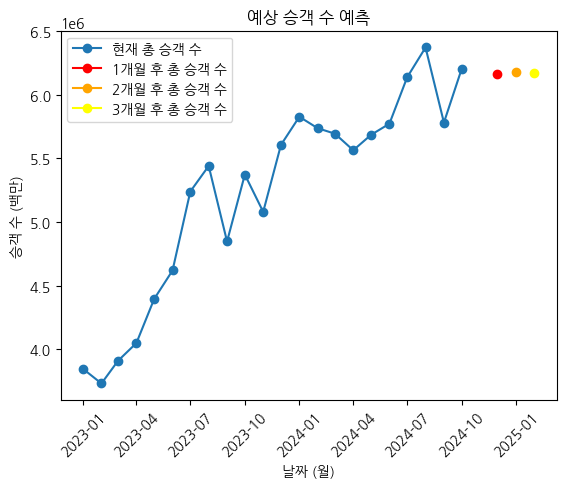

In [ ]:
import matplotlib.pyplot as plt
# 시각화
# 폰트 설치
plt.rc('font', family='NanumGothic')

plt.plot(data.index, data["Total"], label="현재 총 승객 수", marker='o')

# 예측 날짜 계산
forecast_dates = pd.date_range(start=data.index[-1], periods=model_steps + 1, freq='M')[1:]

# 예측된 3개월 후 승객 수를 시각화
plt.plot(forecast_dates[0], forecast[0], label="1개월 후 총 승객 수", marker='o', color='red')
plt.plot(forecast_dates[1], forecast[1], label="2개월 후 총 승객 수", marker='o', color='orange')
plt.plot(forecast_dates[2], forecast[2], label="3개월 후 총 승객 수", marker='o', color='yellow')

# 레이블 설정
plt.xlabel("날짜 (월)")
plt.ylabel("승객 수 (백만)")
plt.title("예상 승객 수 예측")
plt.legend()

# x축 레이블을 회전시켜서 가독성 향상
plt.xticks(rotation=45)

# 시각화 출력
plt.show()